<a href="https://colab.research.google.com/github/splendid14/Colab-sync/blob/main/4_age_0_7%2C_7_13%2C_13_19_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
from scipy import stats
from matplotlib import pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import math

% pip install dmba
import dmba

%precision 3
%matplotlib inline

#from google.colab import files
#uploaded = files.upload()

# Code to read csv file into Colaboratory:
!pip install openpyxl==3.0.9
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

sns.set()

plt.rcParams['figure.dpi'] = 100
plt.rcParams["figure.figsize"] = 5,5
plt.rcParams['savefig.dpi'] = 300

In [4]:
# Load data from group 1

link1 = 'https://drive.google.com/open?id=1-DPd6TswIjZ1kvMsVfqGz2Y2cSX9Y0gA'
fluff, id = link1.split('=')
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Filename1.xlsx')  
df1 = pd.read_excel('Filename1.xlsx', header=1)

data1=df1.query('(Age_applicable == True) or (Age_applicable == False)')  # or (Age_applicable == False)
maledata1=data1.query('sex == "M"')
femaledata1=data1.query('sex == "F"')

def both1(a,b):
  return data1.query('chronologic_age >= @a & chronologic_age < @b')

def male1(a,b):
  return maledata1.query('chronologic_age >= @a & chronologic_age < @b')

def female1(a,b):
  return femaledata1.query('chronologic_age >= @a & chronologic_age < @b')

def both1_randsel(a,b,c):
  df=pd.DataFrame(columns=list(data1.columns))
  for i in range(a,b):
    if c <= len(data1.query('chronologic_age >= @i & chronologic_age < @i+1')) :
      df=pd.concat([df,data1.query('chronologic_age >= @i & chronologic_age < @i+1').sample(n=c)])
    else:
      df=pd.concat([df,data1.query('chronologic_age >= @i & chronologic_age < @i+1')])
  return df

def male1_randsel(a,b,c):
  df=pd.DataFrame(columns=list(data1.columns))
  for i in range(a,b):
    if c <= len(maledata1.query('chronologic_age >= @i & chronologic_age < @i+1')) :
      df=pd.concat([df,maledata1.query('chronologic_age >= @i & chronologic_age < @i+1').sample(n=c)])
    else:
      df=pd.concat([df,maledata1.query('chronologic_age >= @i & chronologic_age < @i+1')])
  return df

def female1_randsel(a,b,c):
  df=pd.DataFrame(columns=list(data1.columns))
  for i in range(a,b):
    if c <= len(femaledata1.query('chronologic_age >= @i & chronologic_age < @i+1')) :
      df=pd.concat([df,femaledata1.query('chronologic_age >= @i & chronologic_age < @i+1').sample(n=c)])
    else:
      df=pd.concat([df,femaledata1.query('chronologic_age >= @i & chronologic_age < @i+1')])
  return df

In [5]:
# Load data from group 2

link2 = 'https://drive.google.com/open?id=1-DNxDZvpjcNVzKTTdCo-7F7s2sVlUKeT'
fluff, id = link2.split('=')
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Filename2.xlsx')  
df2 = pd.read_excel('Filename2.xlsx', header=1)

data2=df2.query('(Age_applicable == True) or (Age_applicable == False)') #  or (Age_applicable == False)
maledata2=data2.query('sex == "M"')
femaledata2=data2.query('sex == "F"')

def both2(a,b):
  return data2.query('chronologic_age >= @a & chronologic_age < @b')

def male2(a,b):
  return maledata2.query('chronologic_age >= @a & chronologic_age < @b')

def female2(a,b):
  return femaledata2.query('chronologic_age >= @a & chronologic_age < @b')

In [6]:
# Load data from group 1+2

link3 = 'https://drive.google.com/open?id=1-E0991MsPZ7QwfqB4J03JvTLFJ2fqcU_'
fluff, id = link3.split('=')
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Filename3.xlsx')  
df3 = pd.read_excel('Filename3.xlsx', header=1)

data3=df3.query('(Age_applicable == True) or (Age_applicable == False)')
maledata3=data3.query('sex == "M"')
femaledata3=data3.query('sex == "F"')

def both3(a,b):
  return data3.query('chronologic_age >= @a & chronologic_age < @b')

def male3(a,b):
  return maledata3.query('chronologic_age >= @a & chronologic_age < @b')

def female3(a,b):
  return femaledata3.query('chronologic_age >= @a & chronologic_age < @b')

def both3_randsel(a,b,c):
  df=pd.DataFrame(columns=list(data3.columns))
  for i in range(a,b):
    if c <= len(data3.query('chronologic_age >= @i & chronologic_age < @i+1')) :
      df=pd.concat([df,data3.query('chronologic_age >= @i & chronologic_age < @i+1').sample(n=c)])
    else:
      df=pd.concat([df,data3.query('chronologic_age >= @i & chronologic_age < @i+1')])
  return df

def male3_randsel(a,b,c):
  df=pd.DataFrame(columns=list(data3.columns))
  for i in range(a,b):
    if c <= len(maledata3.query('chronologic_age >= @i & chronologic_age < @i+1')) :
      df=pd.concat([df,maledata3.query('chronologic_age >= @i & chronologic_age < @i+1').sample(n=c)])
    else:
      df=pd.concat([df,maledata3.query('chronologic_age >= @i & chronologic_age < @i+1')])
  return df

def female3_randsel(a,b,c):
  df=pd.DataFrame(columns=list(data3.columns))
  for i in range(a,b):
    if c <= len(femaledata3.query('chronologic_age >= @i & chronologic_age < @i+1')) :
      df=pd.concat([df,femaledata3.query('chronologic_age >= @i & chronologic_age < @i+1').sample(n=c)])
    else:
      df=pd.concat([df,femaledata3.query('chronologic_age >= @i & chronologic_age < @i+1')])
  return df

In [7]:
a=data3

#Femur measure
F_measure=[]
F_measure_number=[19, 20, 21, 24, 25, 33, 35, 36, 43, 44, 51, 52, 55, 56, 59, 60]
for i in F_measure_number:
  F_measure.append(a.columns[i])

#Femur ratio
F_ratio=[]
F_ratio_number=[22, 23, 26, 27, 28, 29, 30, 31, 32, 34, 37, 38, 39, 40, 41, 42, 45, 46, 47, 48, 49, 50, 53, 57, 61, 62]
for i in F_ratio_number:
  F_ratio.append(a.columns[i])

#Tibia measure
T_measure=[]

T_measure_number=[66, 67, 68, 71, 72, 80, 81, 86, 89, 90, 91, 98, 99, 106, 107]
for i in T_measure_number:
  T_measure.append(a.columns[i])
#Tibia ratio
T_ratio=[]
T_ratio_number=[69, 70, 73, 74, 75, 76, 77, 78, 79, 82, 83, 84, 87, 92, 93, 94, 95, 96, 97, 100, 101, 102, 103, 104, 105, 108, 109]
for i in T_ratio_number:
  T_ratio.append(a.columns[i])

#Patella measure
Pat_measure=[]
Pat_measure_number=[112, 113, 114, 115, 116]
for i in Pat_measure_number:
  Pat_measure.append(a.columns[i])

#Patella ratio
Pat_ratio=[]
Pat_ratio_number=[117, 118, 119, 120]
for i in Pat_ratio_number:
  Pat_ratio.append(a.columns[i])

#Fibula measure
Fib_measure=[]
Fib_measure_number=[122, 123, 124, 127, 129]
for i in Fib_measure_number:
  Fib_measure.append(a.columns[i])

#Fibula ratio
Fib_ratio=[]
Fib_ratio_number=[125, 126, 128]
for i in Fib_ratio_number:
  Fib_ratio.append(a.columns[i])

F_all=F_measure+F_ratio

T_all=T_measure+T_ratio

Pat_all=Pat_measure+Pat_ratio

Fib_all=Fib_measure+Fib_ratio

predictors_all=F_all+T_all+Pat_all+Fib_all
predictors_all_measures=F_measure+T_measure+Pat_measure+Fib_measure
predictors_all_ratios=F_ratio+T_measure+Pat_measure+Fib_measure

predictors_list=[]
predictors_list.append(F_measure)
predictors_list.append(F_ratio)
predictors_list.append(T_measure)
predictors_list.append(T_ratio)
predictors_list.append(Pat_measure)
predictors_list.append(Pat_ratio)
predictors_list.append(Fib_measure)
predictors_list.append(Fib_ratio)
predictors_list.append(predictors_all)
predictors_list.append(predictors_all_measures)
predictors_list.append(predictors_all_ratios)

predictors=[]

print(predictors)
print(len(predictors))

for i in range(len(predictors)):
  print(predictors[i])

outcome=a.columns[14]

[]
0


In [14]:
sample1=female3(0,7).query('Group == 1')

model1=[]

for i in range(len(predictors_list)):
  groups = np.arange(len(sample1))
  model1.append(sm.OLS(sample1[outcome], sample1[predictors_list[i]].assign(const=1), groups=groups).fit())
  print(model1[i].summary().tables[1])



sample2=female3(7,13).query('Group == 1')

model2=[]

for i in range(len(predictors_list)):
  groups = np.arange(len(sample2))
  model2.append(sm.OLS(sample2[outcome], sample2[predictors_list[i]].assign(const=1), groups=groups).fit())
  print(model2[i].summary().tables[1])


sample3=female3(13,18).query('Group == 1')

model3=[]

for i in range(len(predictors_list)):
  groups = np.arange(len(sample2))
  model3.append(sm.OLS(sample3[outcome], sample3[predictors_list[i]].assign(const=1), groups=groups).fit())
  print(model3[i].summary().tables[1])

                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
F_meta_width            0.0790      0.102      0.777      0.442      -0.127       0.285
F_epi_prox_width        0.0388      0.120      0.323      0.749      -0.205       0.282
F_epi_mid_width         0.0218      0.112      0.194      0.847      -0.205       0.248
F_epi_medcart           0.0165      0.148      0.111      0.912      -0.284       0.317
F_epi_latcart           0.0155      0.140      0.110      0.913      -0.268       0.299
F_CPV                  -0.0401      0.126     -0.319      0.752      -0.294       0.214
F_medcap_tiptotip      -0.1531      0.112     -1.361      0.181      -0.380       0.074
F_latcap_tiptotip       0.1010      0.132      0.767      0.447      -0.165       0.367
F_medArticular         -0.1234      0.194     -0.636      0.528      -0.516       0.269
F_latArticular          0.2287  

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1648: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1649: RuntimeWarning: invalid value encountered in double_scalars
  * (1 - self.rsquared))
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1578: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
F_meta_width                  0.1971      0.159      1.239      0.234      -0.142       0.536
F_epi_prox_width             -0.0468      0.145     -0.324      0.751      -0.355       0.261
F_epi_mid_width              -0.2386      0.184     -1.294      0.215      -0.632       0.154
F_epi_medcart                -0.3773      0.193     -1.955      0.069      -0.789       0.034
F_epi_latcart                -0.5481      0.239     -2.296      0.037      -1.057      -0.039
F_CPV                         0.1841      0.142      1.293      0.216      -0.119       0.488
F_medcap_tiptotip            -0.0341      0.120     -0.284      0.781      -0.290       0.222
F_latcap_tiptotip             0.0434      0.155      0.280      0.783      -0.286       0.373
F_medArticular                0.3967      0.195      2.031  

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1376: RuntimeWarning: invalid value encountered in multiply
  cov_p = self.normalized_cov_params * scale
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse


                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
F_epiprox_/_meta                    14.6070     73.466      0.199      0.844    -136.405     165.619
F_epimid_/_meta                     -2.5946      6.390     -0.406      0.688     -15.729      10.540
F_medcart_/_mid                     -4.9822      5.121     -0.973      0.340     -15.510       5.545
F_latcart_/_mid                     -5.7307      5.891     -0.973      0.340     -17.840       6.378
F_med+lat_/_epimid                 -10.7129     11.012     -0.973      0.340     -33.349      11.923
F_epimid_/_epitotal(mid+med+lat)     9.5486     31.479      0.303      0.764     -55.157      74.254
F_medcart_/_meta                    -5.3788      5.529     -0.973      0.340     -16.744       5.987
F_latcart_/_meta                    -6.1869      6.360     -0.973      0.340     -19.260   

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


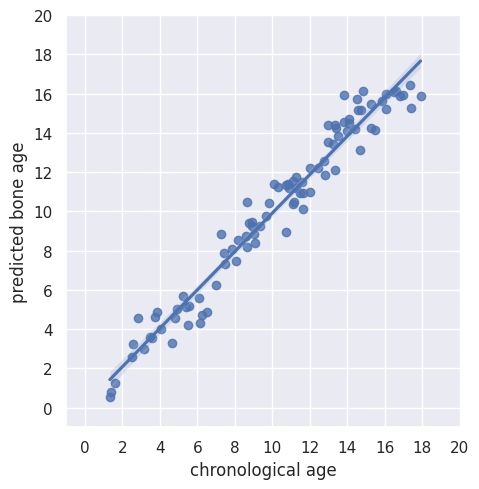

<Figure size 500x500 with 0 Axes>

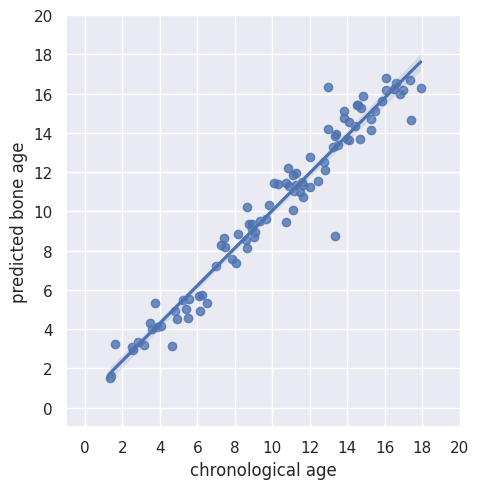

<Figure size 500x500 with 0 Axes>

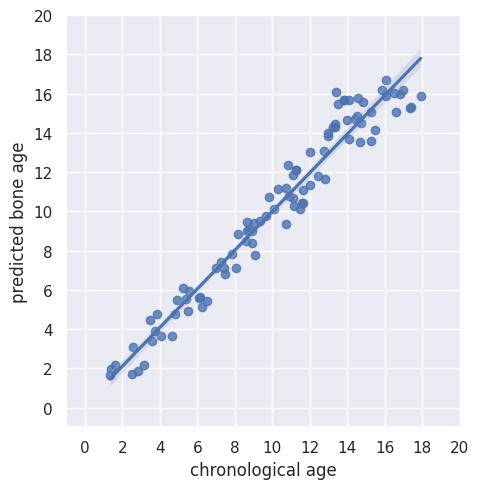

<Figure size 500x500 with 0 Axes>

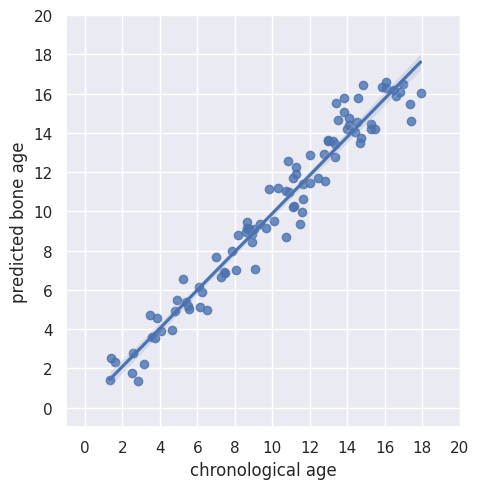

<Figure size 500x500 with 0 Axes>

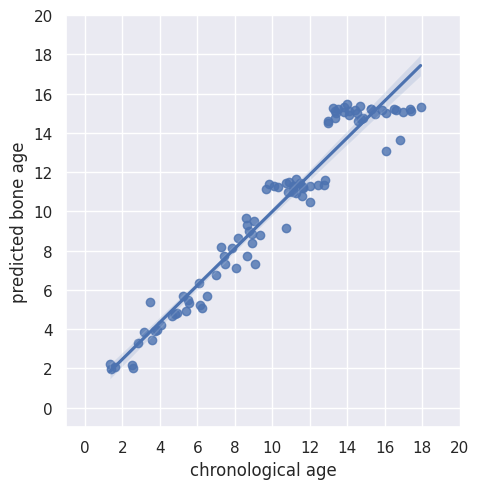

<Figure size 500x500 with 0 Axes>

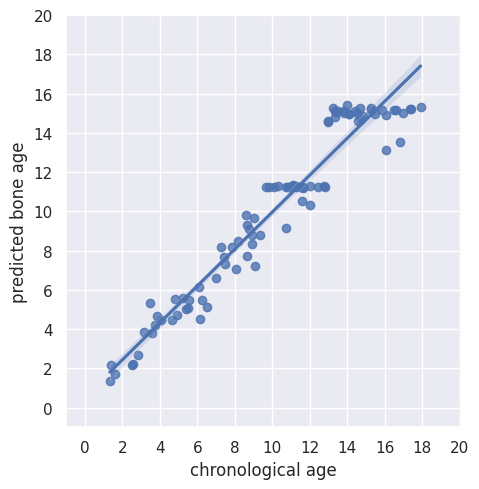

<Figure size 500x500 with 0 Axes>

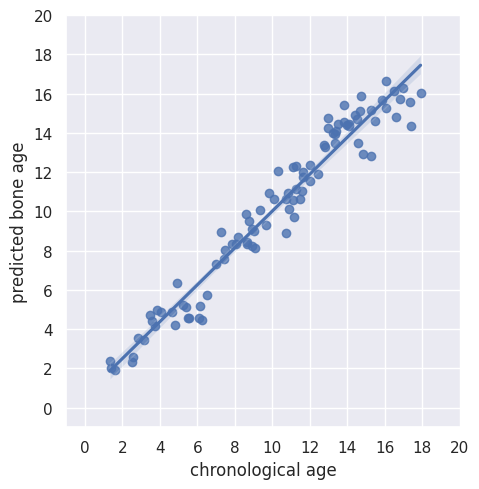

<Figure size 500x500 with 0 Axes>

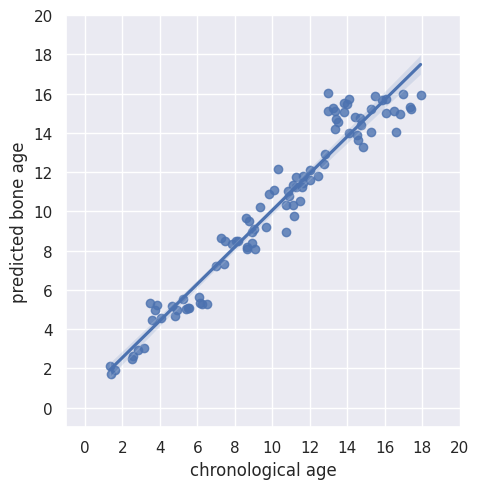

<Figure size 500x500 with 0 Axes>

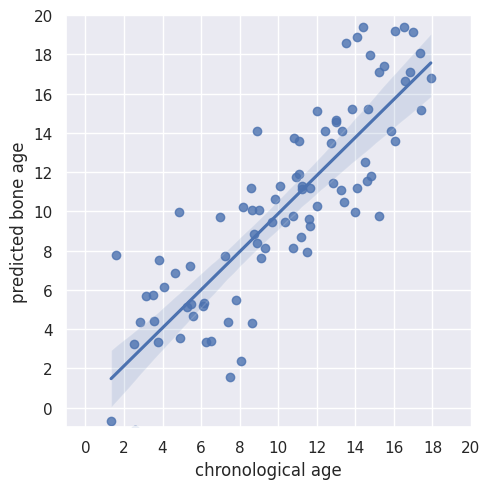

<Figure size 500x500 with 0 Axes>

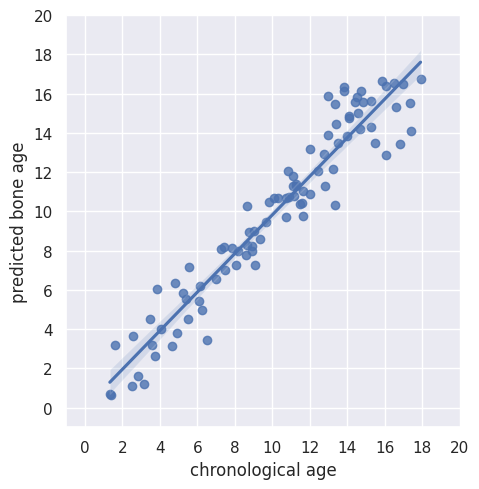

<Figure size 500x500 with 0 Axes>

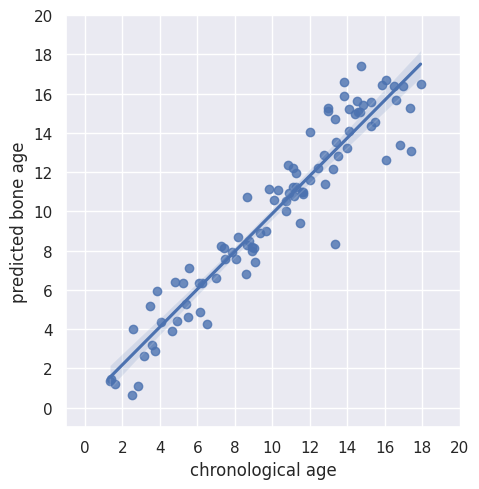

<Figure size 500x500 with 0 Axes>

In [15]:
# Graph based on model above

val_set=female3(0,18).query('Group == 2 & BA_GP.isnull()', engine='python')

for i in range(len(predictors_list)):  
  y1=model1[i].predict(val_set.query('chronologic_age < 7')[predictors_list[i]].assign(const=1))
  x1=val_set.query('chronologic_age < 7')[val_set.columns[14]]

  y2=model2[i].predict(val_set.query('chronologic_age >= 7 & chronologic_age < 13')[predictors_list[i]].assign(const=1))
  x2=val_set.query('chronologic_age >= 7 & chronologic_age < 13')[val_set.columns[14]]

  y3=model3[i].predict(val_set.query('chronologic_age >= 13')[predictors_list[i]].assign(const=1))
  x3=val_set.query('chronologic_age >= 13')[val_set.columns[14]]

  y=y1.append(y2.append(y3))
  x=x1.append(x2.append(x3))

  graphDF = pd.DataFrame({'chronological age': x, 'predicted bone age': y})
  g=sns.lmplot(x='chronological age', y='predicted bone age', data=graphDF)
  g.set(xlim=(-1,20), ylim=(-1,20), xticks=np.arange(-2, 22, 2), yticks=np.arange(-2, 22, 2))
  plt.figure()

In [25]:
# Stepwise regression

def train_model(variables):
  if len(variables) == 0:
    return None
  model=LinearRegression()
  model.fit(X[variables], y)
  return model

def score_model(model, variables):
  if len(variables) == 0:
    return dmba.AIC_score(y, [y.mean()]*len(y), model, df=1)
  return dmba.AIC_score(y, model.predict(X[variables]), model)

best_model1=[]
best_variables1=[]
sample_1=female3(1,7).query('Group == 1')

for i in range(len(predictors_list)):
  y=sample_1[outcome]
  X=sample_1[predictors_list[i]]
  
  best_model_current, best_variables_current = dmba.stepwise_selection(X.columns, train_model, score_model, verbose=True)
  best_model1.append(best_model_current)
  best_variables1.append(best_variables_current)
  
  print('Coefficients:')
  for name, coef in zip(best_variables1[i], best_model1[i].coef_):
    print(f'{name}: {coef:.4f}')
  print(f'Intercept: {best_model1[i].intercept_:.4f}')


best_model2=[]
best_variables2=[]
sample_2=female3(7,13).query('Group == 1')

for i in range(len(predictors_list)):
  y=sample_2[outcome]
  X=sample_2[predictors_list[i]]
  
  best_model_current, best_variables_current = dmba.stepwise_selection(X.columns, train_model, score_model, verbose=True)
  best_model2.append(best_model_current)
  best_variables2.append(best_variables_current)
  
  print('Coefficients:')
  for name, coef in zip(best_variables2[i], best_model2[i].coef_):
    print(f'{name}: {coef:.4f}')
  print(f'Intercept: {best_model2[i].intercept_:.4f}')


best_model3=[]
best_variables3=[]
sample_3=female3(13,17).query('Group == 1')

for i in range(len(predictors_list)):
  y=sample_3[outcome]
  X=sample_3[predictors_list[i]]
  
  best_model_current, best_variables_current = dmba.stepwise_selection(X.columns, train_model, score_model, verbose=True)
  best_model3.append(best_model_current)
  best_variables3.append(best_variables_current)
  
  print('Coefficients:')
  for name, coef in zip(best_variables3[i], best_model3[i].coef_):
    print(f'{name}: {coef:.4f}')
  print(f'Intercept: {best_model3[i].intercept_:.4f}')

Variables: F_meta_width, F_epi_prox_width, F_epi_mid_width, F_epi_medcart, F_epi_latcart, F_CPV, F_medcap_tiptotip, F_latcap_tiptotip, F_medArticular, F_latArticular, F_sag_med_inf_cart, F_sag_med_post_cart, F_sag_lat_inf_cart, F_sag_lat_post_cart, F_physis_med, F_physis_lat
Start: score=211.72, constant
Step: score=127.31, add F_epi_prox_width
Step: score=126.22, add F_latcap_tiptotip
Step: score=125.61, add F_medcap_tiptotip
Step: score=125.61, unchanged None
Coefficients:
F_epi_prox_width: 0.1499
F_latcap_tiptotip: 0.1847
F_medcap_tiptotip: -0.1346
Intercept: -2.1821
Variables: F_epiprox_/_meta, F_epimid_/_meta, F_medcart_/_mid, F_latcart_/_mid, F_med+lat_/_epimid, F_epimid_/_epitotal(mid+med+lat), F_medcart_/_meta, F_latcart_/_meta, F_med+lat_/_meta, F_CPV_/_meta, F_medcap_/_meta, F_latcap_/_meta, F_med+latcap_/_meta, F_medcap_/_epiprox, F_latcap_/_epiprox, F_med+latcap_/_epiprox, F_medA_/_meta, F_latA_/_meta, F_medA+latA_/_meta, F_medA_/_epirox, F_latA_/_epiprox, F_medA+latA_/_epi

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


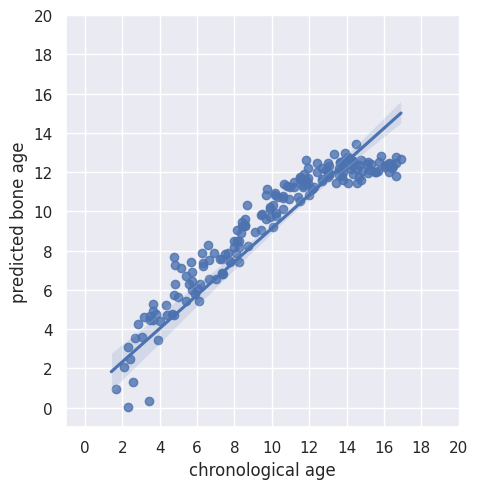

<Figure size 500x500 with 0 Axes>

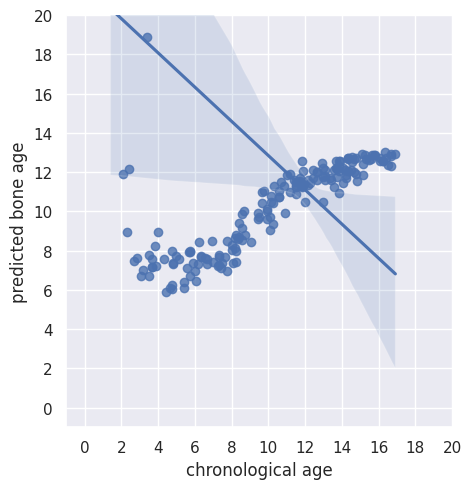

<Figure size 500x500 with 0 Axes>

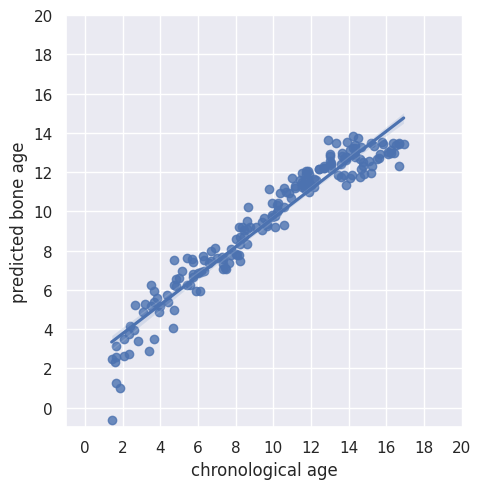

<Figure size 500x500 with 0 Axes>

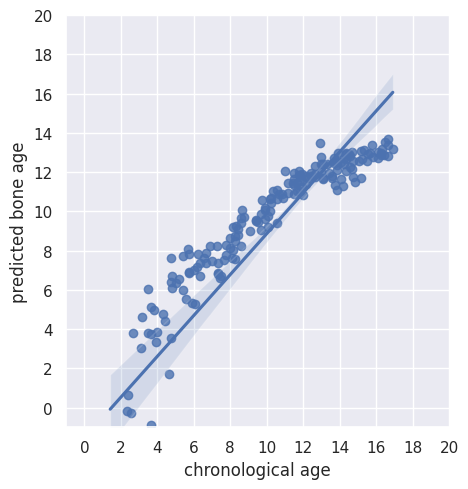

<Figure size 500x500 with 0 Axes>

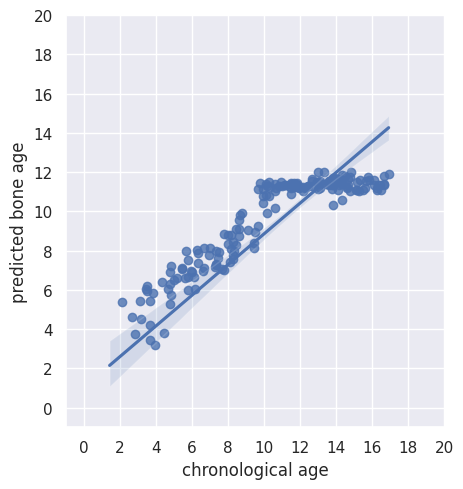

<Figure size 500x500 with 0 Axes>

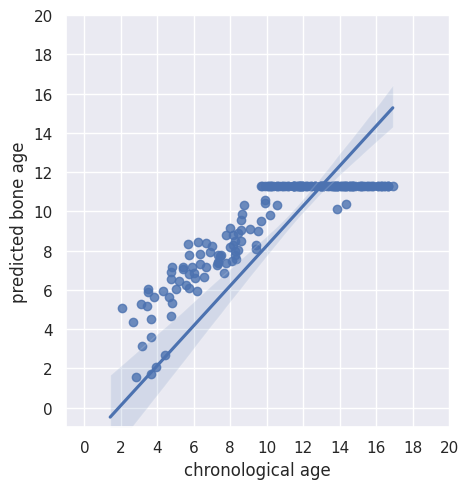

<Figure size 500x500 with 0 Axes>

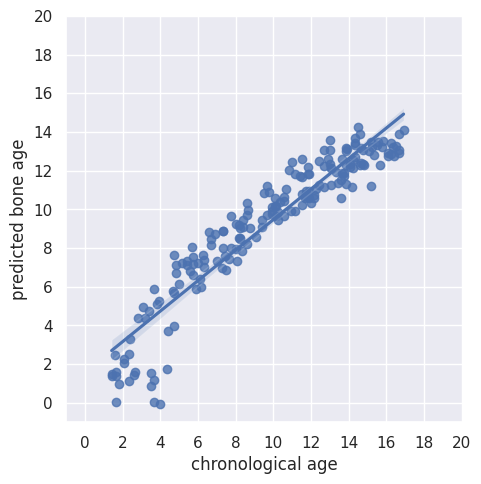

<Figure size 500x500 with 0 Axes>

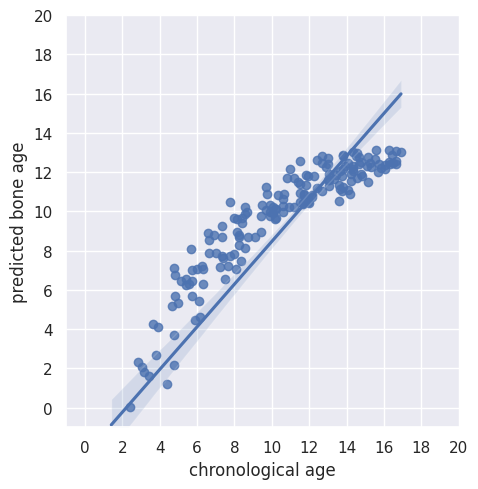

<Figure size 500x500 with 0 Axes>

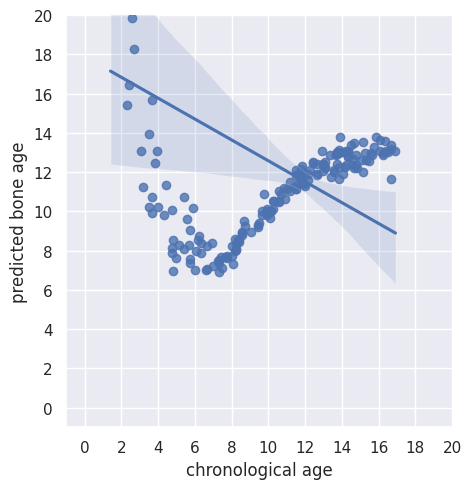

<Figure size 500x500 with 0 Axes>

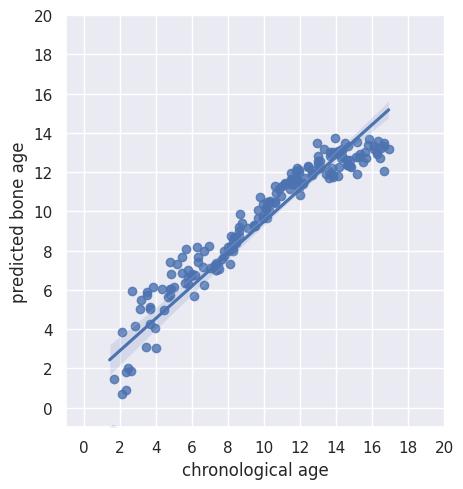

<Figure size 500x500 with 0 Axes>

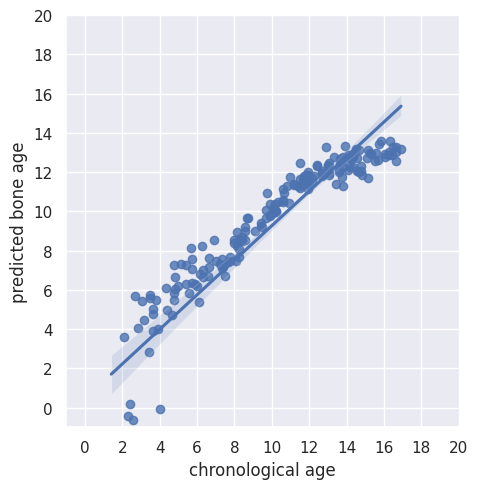

<Figure size 500x500 with 0 Axes>

In [27]:
# Graph based on model above

val_set=female3(1,17).query('Group == 1 & BA_GP.isnull()', engine='python')

for i in range(len(predictors_list)):
  y1=best_model2[i].predict(val_set.query('chronologic_age < 7')[best_variables2[i]]).tolist()
  x1=val_set.query('chronologic_age < 7')[val_set.columns[14]]

  y2=best_model2[i].predict(val_set.query('chronologic_age >= 7 & chronologic_age < 13')[best_variables2[i]]).tolist()
  x2=val_set.query('chronologic_age >= 7 & chronologic_age < 13')[val_set.columns[14]]

  y3=best_model2[i].predict(val_set.query('chronologic_age >= 13')[best_variables2[i]]).tolist()
  x3=val_set.query('chronologic_age >= 13')[val_set.columns[14]]

  y=y1+y2+y3
  x=x1.append(x2.append(x3))

  graphDF = pd.DataFrame({'chronological age': x, 'predicted bone age': y})
  g=sns.lmplot(x='chronological age', y='predicted bone age', data=graphDF)
  g.set(xlim=(-1,20), ylim=(-1,20), xticks=np.arange(-2, 22, 2), yticks=np.arange(-2, 22, 2))
  plt.figure()